In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

In [195]:
#!pip install --upgrade scikit-learn
#!pip install --upgrade imbalanced-learn scikit-learn

In [196]:
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


In [197]:
data.shape

(284807, 31)

In [198]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<Axes: >

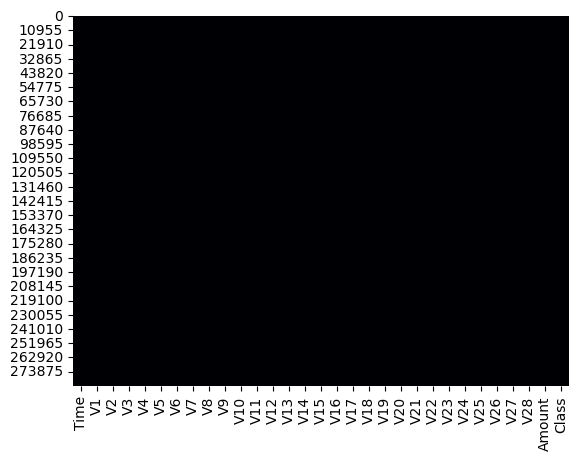

In [200]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False)

In [201]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


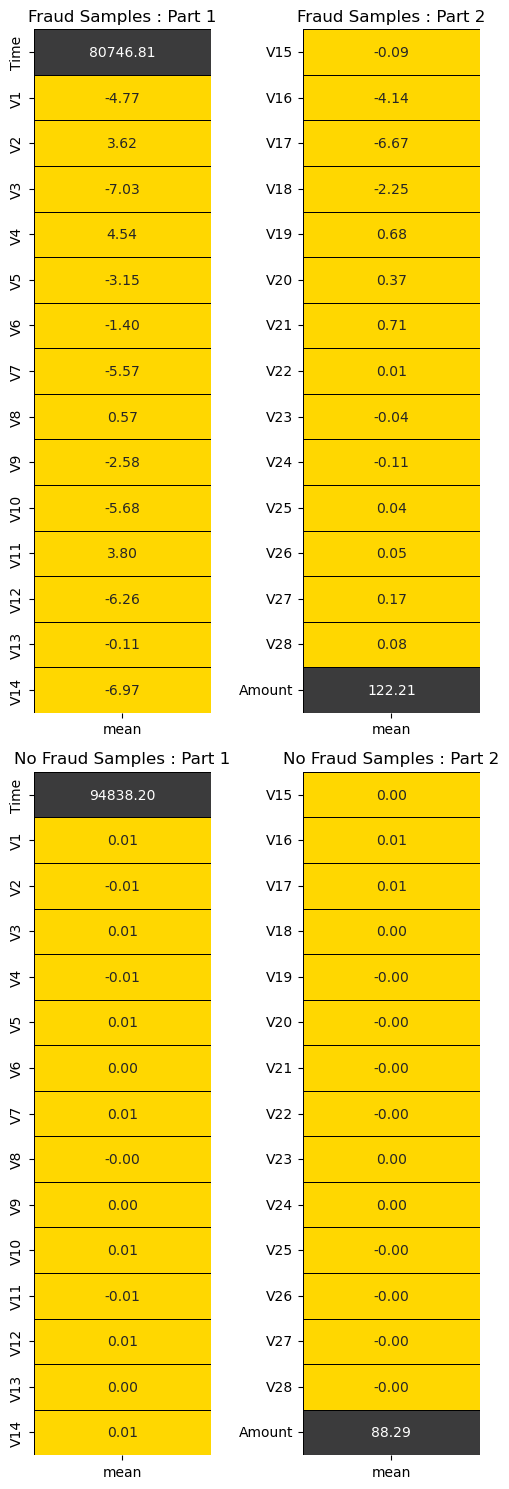

In [202]:
fraud = data[data['Class'] == 1].describe().T
nofraud = data[data['Class'] == 0].describe().T

colors = ['#FFD700','#3B3B3C']

fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize = (5,15))
plt.subplot(2,2,1)
sns.heatmap(fraud[['mean']][:15],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Fraud Samples : Part 1');

plt.subplot(2,2,2)
sns.heatmap(fraud[['mean']][15:30],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Fraud Samples : Part 2');

plt.subplot(2,2,3)
sns.heatmap(nofraud[['mean']][:15],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Fraud Samples : Part 1');

plt.subplot(2,2,4)
sns.heatmap(nofraud[['mean']][15:30],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Fraud Samples : Part 2');

fig.tight_layout(w_pad = 2)

### Target Variable Visualization 

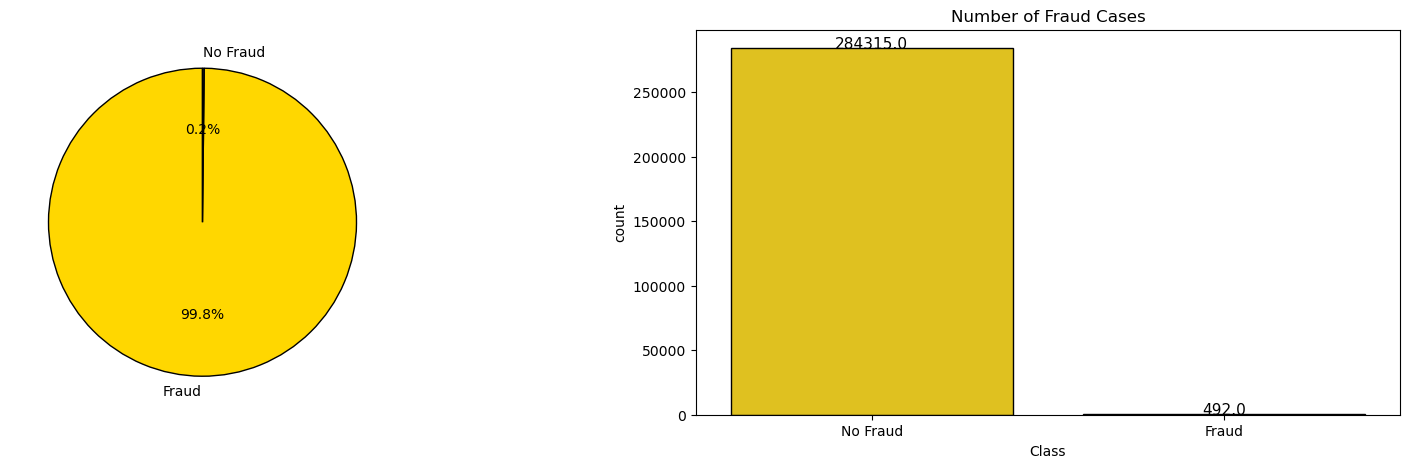

In [203]:
fraud = len(data[data['Class'] == 1]) / len(data) * 100
nofraud = len(data[data['Class'] == 0]) / len(data) * 100
fraud_percentage = [nofraud,fraud]

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(fraud_percentage,labels = ['Fraud','No Fraud'],autopct='%1.1f%%',startangle = 90,colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})

plt.subplot(1,2,2)
ax = sns.countplot(x='Class', data=data, edgecolor='black', palette=colors)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize=11)
ax.set_xticklabels(['No Fraud','Fraud'])
plt.title('Number of Fraud Cases');


### Correlation Matrix :

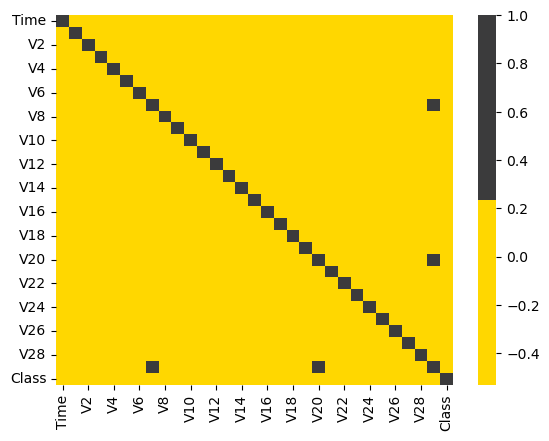

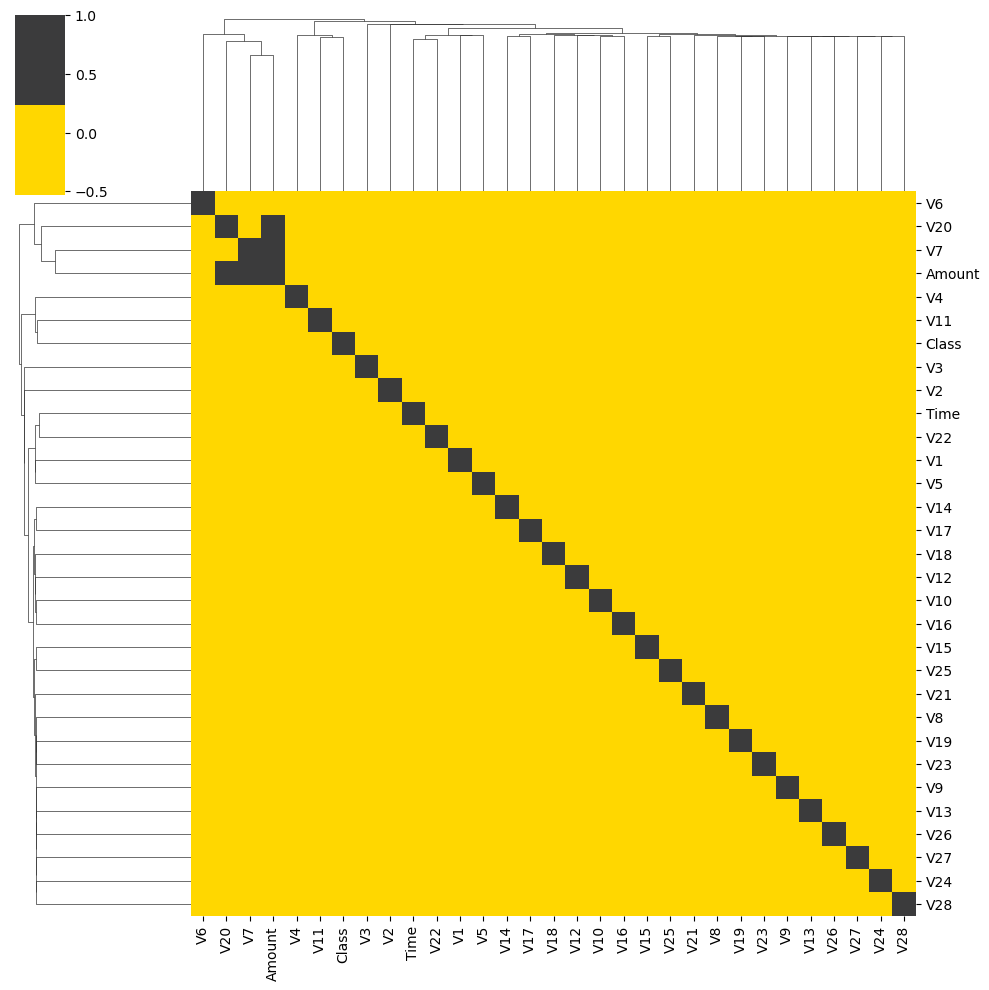

In [204]:
sns.heatmap(data.corr(),cmap = colors,cbar = True)
sns.clustermap(data.corr(),cmap = colors,cbar = True)

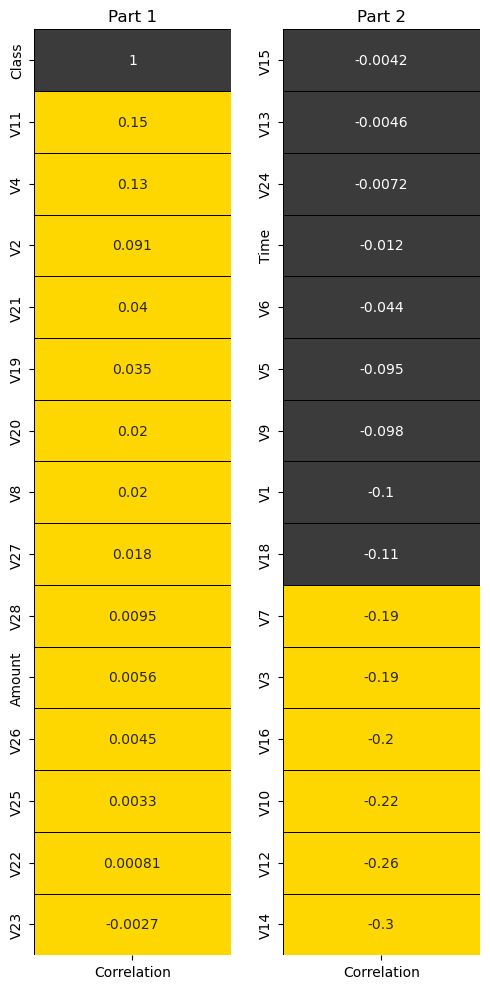

In [205]:
corr = data.corrwith(data['Class']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlation']
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,10))

plt.subplot(1,2,1)
sns.heatmap(corr.iloc[:15,:],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False)
plt.title('Part 1')

plt.subplot(1,2,2)
sns.heatmap(corr.iloc[15:30],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False)
plt.title('Part 2')

fig.tight_layout(w_pad = 2)

### ANOVA Test :

In [206]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

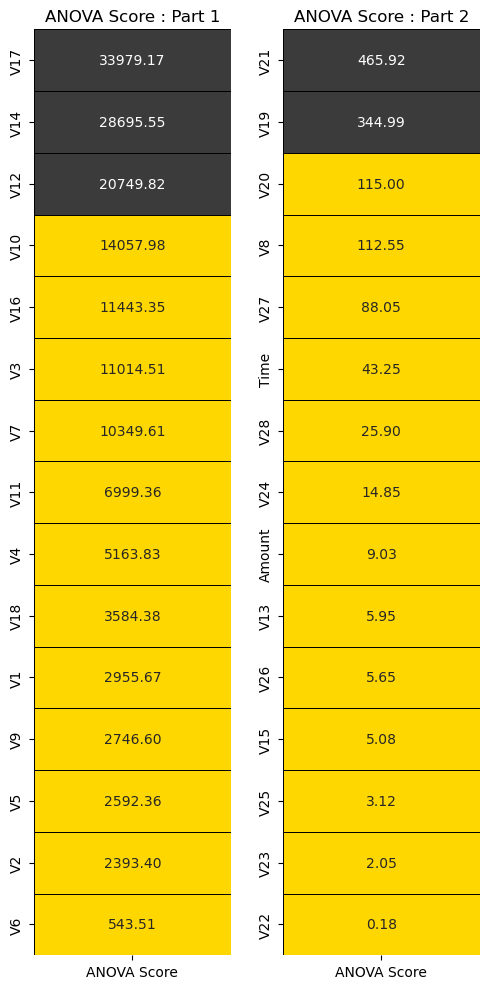

In [207]:
features = data.loc[:,:'Amount']
target = data.loc[:,'Class']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 
featureScores = featureScores.sort_values(ascending = False,by = 'ANOVA Score')

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,10))

plt.subplot(1,2,1)
sns.heatmap(featureScores.iloc[:15,:],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False, fmt = '.2f')
plt.title('ANOVA Score : Part 1')

plt.subplot(1,2,2)
sns.heatmap(featureScores.iloc[15:30],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False, fmt = '.2f')
plt.title('ANOVA Score : Part 2')

fig.tight_layout(w_pad = 2)

#### Dataset for Model based on Correlation Plot :

In [208]:
df1 = data[['V3','V4','V7','V10','V11','V12','V14','V16','V17','Class']].copy(deep = True)
df1.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
0,2.54,1.38,0.24,0.09,-0.55,-0.62,-0.31,-0.47,0.21,0
1,0.17,0.45,-0.08,-0.17,1.61,1.07,-0.14,0.46,-0.11,0
2,1.77,0.38,0.79,0.21,0.62,0.07,-0.17,-2.89,1.11,0
3,1.79,-0.86,0.24,-0.05,-0.23,0.18,-0.29,-1.06,-0.68,0
4,1.55,0.40,0.59,0.75,-0.82,0.54,-1.12,-0.45,-0.24,0


#### Dataset for Model based on ANOVA Score :

In [209]:
df2 = data.copy(deep = True)
df2.drop(columns = list(featureScores.index[20:]),inplace = True)
df2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V14,V16,V17,V18,V19,V20,V21,V27,Class
0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,...,-0.62,-0.31,-0.47,0.21,0.03,0.40,0.25,-0.02,0.13,0
1,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,...,1.07,-0.14,0.46,-0.11,-0.18,-0.15,-0.07,-0.23,-0.01,0
2,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,...,0.07,-0.17,-2.89,1.11,-0.12,-2.26,0.52,0.25,-0.06,0
3,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,...,0.18,-0.29,-1.06,-0.68,1.97,-1.23,-0.21,-0.11,0.06,0
4,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,...,0.54,-1.12,-0.45,-0.24,-0.04,0.80,0.41,-0.01,0.22,0


# Balancing Data

In [210]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

#### Data Balancing for Model based on Correlation Plot :

In [211]:
over = SMOTE(sampling_strategy = 0.5)
under = RandomUnderSampler(sampling_strategy = 0.1)
f1 = df1.iloc[:,:9].values
t1 = df1.iloc[:,9].values

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)

Counter({0: 4920, 1: 2460})

#### Data Balancing for Model based on ANOVA Score :

In [212]:
over = SMOTE(sampling_strategy = 0.5)
under = RandomUnderSampler(sampling_strategy = 0.1)
f2 = df2.iloc[:,:20].values
t2 = df2.iloc[:,20].values

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f2, t2 = pipeline.fit_resample(f2, t2)
Counter(t2)

Counter({0: 4920, 1: 2460})

# Modeling

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [214]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(f1, t1, test_size = 0.20, random_state = 2)
x_train2, x_test2, y_train2, y_test2 = train_test_split(f2, t2, test_size = 0.20, random_state = 2)

In [215]:
def model(classifier, x_train, y_train, x_test, y_test):
    classifier.fit(x_train, y_train)
    
    # Predict labels
    predicted_labels = classifier.predict(x_test)
    
    # Print classification report
    print(classification_report(y_test, predicted_labels))
    
    return predicted_labels

    
    # Get decision values for ROC curve calculation
    decision_values = classifier.decision_function(x_test)

    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, decision_values)
    
    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return decision_values

def model_evaluation(classifier, x_test, y_test):
    prediction = classifier.predict(x_test)
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test, prediction)))

### 1] Logistic Regression :

In [216]:
from sklearn.linear_model import LogisticRegression

In [217]:
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2') 

#### Model based on Correlation Plot :

In [218]:
# Call the model function to train the classifier, plot the ROC curve, and return predicted scores
predicted_scores = model(classifier_lr, x_train1, y_train1, x_test1, y_test1)

# Evaluate the classifier and print ROC_AUC score
model_evaluation(classifier_lr, x_test1, y_test1)


              precision    recall  f1-score   support

           0       0.95      0.99      0.97       975
           1       0.98      0.89      0.93       501

    accuracy                           0.96      1476
   macro avg       0.96      0.94      0.95      1476
weighted avg       0.96      0.96      0.96      1476

ROC_AUC Score :  94.05%


In [219]:
#model(classifier_lr,x_train1,y_train1,x_test1,y_test1)
#model_evaluation(classifier_lr,x_test1,y_test1)

#### Model based on ANOVA Score :

In [220]:
model(classifier_lr,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_lr,x_test2,y_test2)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       975
           1       0.98      0.90      0.94       501

    accuracy                           0.96      1476
   macro avg       0.97      0.95      0.96      1476
weighted avg       0.96      0.96      0.96      1476

ROC_AUC Score :  94.80%


### 2] Support Vector Classifier :

In [221]:
from sklearn.svm import SVC

In [222]:
classifier_svc = SVC(probability=False)  # Note: probability=False is the default behavior

#### Model based on Correlation Plot :

In [223]:
decision_values = model(classifier_svc, x_train1, y_train1, x_test1, y_test1)

# Evaluate the classifier and print ROC_AUC score
model_evaluation(classifier_svc, x_test1, y_test1)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       975
           1       0.99      0.88      0.93       501

    accuracy                           0.96      1476
   macro avg       0.97      0.94      0.95      1476
weighted avg       0.96      0.96      0.96      1476

ROC_AUC Score :  93.96%


#### Model based on ANOVA Score :

In [224]:
model(classifier_svc,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_svc,x_test2,y_test2)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       975
           1       0.99      0.90      0.94       501

    accuracy                           0.96      1476
   macro avg       0.97      0.95      0.96      1476
weighted avg       0.97      0.96      0.96      1476

ROC_AUC Score :  94.90%


### 3] Decision Tree Classifier :

In [225]:
from sklearn.tree import DecisionTreeClassifier

In [226]:
classifier_dt = DecisionTreeClassifier()

#### Model based on Correlation Plot :

In [227]:
predicted_labels = model(classifier_dt, x_train1, y_train1, x_test1, y_test1)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       975
           1       0.94      0.96      0.95       501

    accuracy                           0.97      1476
   macro avg       0.96      0.96      0.96      1476
weighted avg       0.97      0.97      0.97      1476



#### Model based on ANOVA Score :

In [228]:
model(classifier_dt,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_dt,x_test2,y_test2)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       975
           1       0.95      0.96      0.96       501

    accuracy                           0.97      1476
   macro avg       0.97      0.97      0.97      1476
weighted avg       0.97      0.97      0.97      1476

ROC_AUC Score :  96.87%


### 4] Random Forest Classifier : 

In [229]:
from sklearn.ensemble import RandomForestClassifier

In [230]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

#### Model based on Correlation Plot :

In [231]:
model(classifier_rf,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_rf,x_test1,y_test1)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       975
           1       0.99      0.88      0.93       501

    accuracy                           0.96      1476
   macro avg       0.97      0.94      0.95      1476
weighted avg       0.96      0.96      0.96      1476

ROC_AUC Score :  93.91%


#### Model based on ANOVA Score :

In [232]:
model(classifier_rf,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_rf,x_test2,y_test2)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       975
           1       0.99      0.87      0.93       501

    accuracy                           0.95      1476
   macro avg       0.96      0.93      0.95      1476
weighted avg       0.96      0.95      0.95      1476

ROC_AUC Score :  93.16%


### 5] K-Nearest Neighbors :

In [233]:
from sklearn.neighbors import KNeighborsClassifier

In [234]:
classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)

#### Model based on Correlation Plot :

In [235]:
model(classifier_knn,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_knn,x_test1,y_test1)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       975
           1       0.98      0.98      0.98       501

    accuracy                           0.99      1476
   macro avg       0.98      0.98      0.98      1476
weighted avg       0.99      0.99      0.99      1476

ROC_AUC Score :  98.39%


#### Model based on ANOVA Score :

In [236]:
model(classifier_knn,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_knn,x_test2,y_test2)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       975
           1       0.97      0.99      0.98       501

    accuracy                           0.99      1476
   macro avg       0.98      0.99      0.98      1476
weighted avg       0.99      0.99      0.99      1476

ROC_AUC Score :  98.53%
